In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [3]:
norm_annotations = pd.read_csv('data/annotated_aact/normalized_annotations_unique_19607.csv', index_col=False)
norm_annotations.head()

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_aact_interventions,aact_intervention_types,canonical_BioLinkBERT-base_conditions,canonical_aact_conditions,Disease Class
0,0,NCT00000117,intravenous immunoglobulin|ivig,immunoglobulin,Drug,multiple sclerosis|optic neuritis,optic neuritis,Cranial Nerve Diseases
1,1,NCT00000146,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
2,2,NCT00000147,corticosteroid,methylprednisolone|prednisone,Drug,multiple sclerosis|optic neuritis,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases
3,3,NCT00000151,acetylsalicylic acid|aspirin,aspirin|acetylsalicylic acid,Drug|Procedure,blindness|diabetes mellitus|diabetic retinopat...,diabetic retinopathy|blindness,Neurologic Manifestations|unknown
4,4,NCT00000170,atropine,atropine|,Drug|Device,amblyopia|anisometropia|moderate amblyopia|str...,amblyopia,Neurologic Manifestations


In [4]:
norm_annotations.shape

(19607, 8)

In [5]:
trial_metadata= pd.read_csv('data/raw_aact/combined_neuro_designs_calculated_full_20240416.csv')
trial_metadata

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/3088525403.py:1: DtypeWarning: Columns (2,7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  aact_metadata= pd.read_csv('data/raw_aact/combined_neuro_designs_calculated_full_20240416.csv')


,nct_id,start_date,completion_date,phase,overall_status,country_name,primary_purpose,allocation,masking,number_of_facilities,were_results_reported,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,agency_class,lead_or_collaborator,sponsor_name,facility_name,country
0,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
1,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
2,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
3,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
4,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259676,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,collaborator,"University of Maryland, Baltimore County",Maryland Treatment Centers,United States
9259677,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,lead,Potomac Health Foundations,Maryland Treatment Centers,United States
9259678,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,collaborator,"University of Maryland, Baltimore County",Maryland Treatment Centers,United States
9259679,NCT06296940,2022-12-01,2024-12-31,Not Applicable,Recruiting,United States,Treatment,Randomized,None (Open Label),1.0,False,1.0,2.0,NaN,OTHER,lead,Potomac Health Foundations,Maryland Treatment Centers,United States


In [7]:
df = trial_metadata[trial_metadata['nct_id'].isin(norm_annotations['nct_id'])]
df

,nct_id,start_date,completion_date,phase,overall_status,country_name,primary_purpose,allocation,masking,number_of_facilities,were_results_reported,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,agency_class,lead_or_collaborator,sponsor_name,facility_name,country
0,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
1,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
2,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
3,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),Mayo Clinic,United States
4,NCT00000117,1995-08-31,1997-12-31,Phase 3,Completed,United States,Treatment,Randomized,Double,2.0,False,NaN,NaN,NaN,NIH,lead,National Eye Institute (NEI),"Mayo Clinic, Department of Neurology",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9259555,NCT06296082,2024-05-01,2027-06-30,Phase 2,Not yet recruiting,NaN,Treatment,Randomized,Double,NaN,False,1.0,11.0,3.0,OTHER,collaborator,McGill University,NaN,NaN
9259556,NCT06296082,2024-05-01,2027-06-30,Phase 2,Not yet recruiting,NaN,Treatment,Randomized,Double,NaN,False,1.0,11.0,3.0,OTHER,collaborator,Aragon Institute of Health Sciences,NaN,NaN
9259670,NCT06296875,2024-03-31,2026-03-31,Not Applicable,Not yet recruiting,United Kingdom,Prevention,Randomized,Triple,1.0,False,3.0,16.0,NaN,OTHER,lead,University of Glasgow,University of Glasgow,United Kingdom
9259671,NCT06296875,2024-03-31,2026-03-31,Not Applicable,Not yet recruiting,United Kingdom,Prevention,Randomized,Triple,1.0,False,3.0,16.0,NaN,OTHER,lead,University of Glasgow,University of Glasgow,United Kingdom


In [63]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [8]:
len(set(df['nct_id']))

19607

# Descriptive Stats

## General

In [376]:
# Convert date columns to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['completion_date'] = pd.to_datetime(df['completion_date'])

# Extract year component and create new columns
df['start_year'] = df['start_date'].dt.year
df['completion_year'] = df['completion_date'].dt.year

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['start_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_date'] = pd.to_datetime(df['completion_date'])
/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1323219768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

In [377]:
trial_metadata = df[['nct_id','start_year', 'completion_year', 'phase', 'overall_status','primary_purpose']]

In [378]:
trial_metadata

,nct_id,start_year,completion_year,phase,overall_status,primary_purpose
0,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
1,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
2,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
3,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
4,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
...,...,...,...,...,...,...
9259555,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259556,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259670,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention
9259671,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention


### Primary Purpose & Status

19285


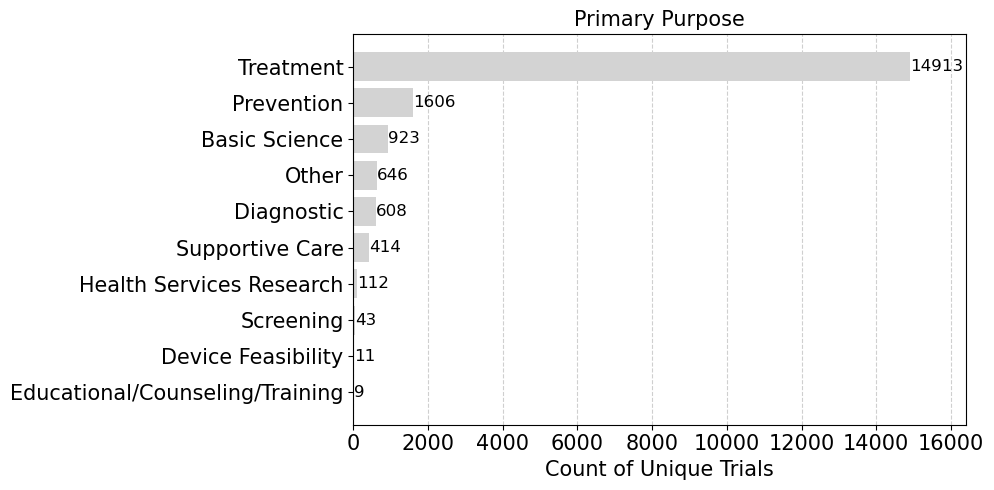

In [681]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'primary_purpose']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['primary_purpose'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Count of Unique Trials', fontsize=15)
plt.title('Primary Purpose', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1500) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/primary_purpose_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()

19607


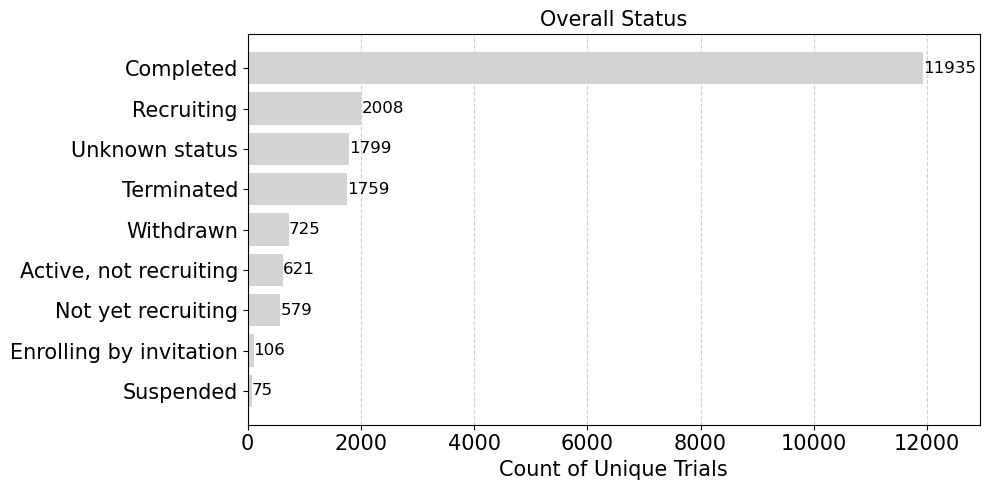

In [682]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['overall_status'].value_counts()
phase_type_counts = phase_type_counts.sort_values(ascending=True)
print(sum(phase_type_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(phase_type_counts.index, phase_type_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Count of Unique Trials', fontsize=15)
plt.title('Overall Status', fontsize=15)
plt.xlim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/trial_status_frequency.png')

# Display the chart
plt.show()

In [683]:
len(unique_pairs_purpose)

19607

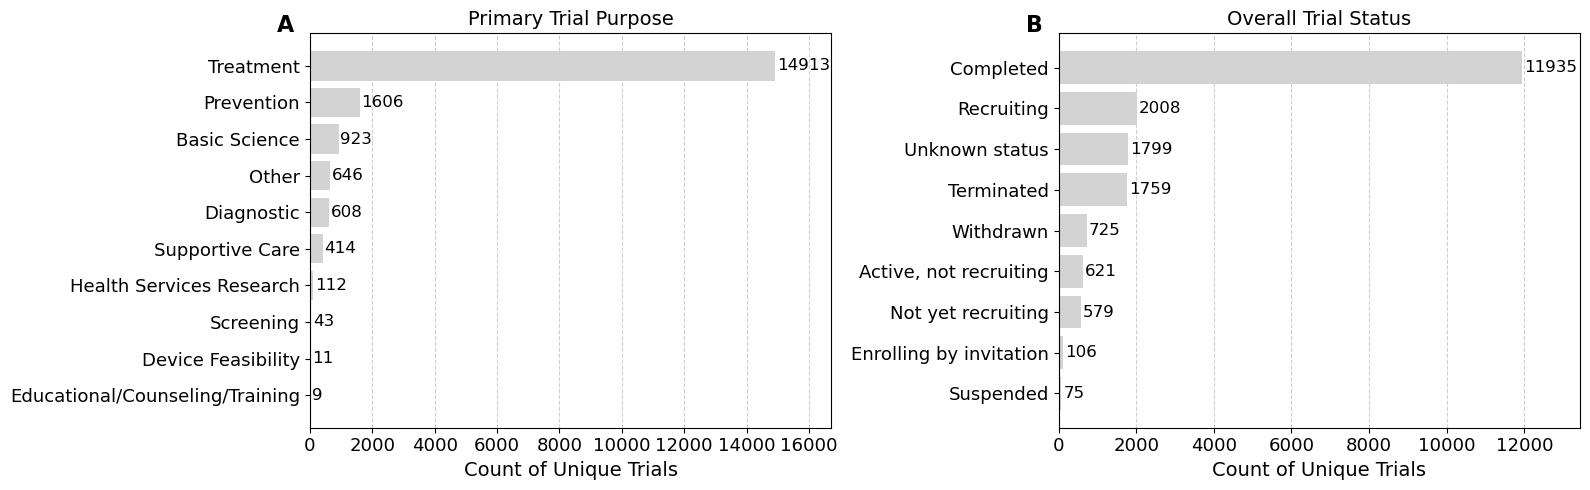

In [684]:
# Keeping only unique nct_id, primary_purpose pairs
unique_pairs_purpose = trial_metadata[['nct_id', 'primary_purpose']].drop_duplicates()

# Counting the number of nct_ids per primary purpose type
purpose_type_counts = unique_pairs_purpose['primary_purpose'].value_counts()
purpose_type_counts = purpose_type_counts.sort_values(ascending=True)

# Keeping only unique nct_id, overall_status pairs
unique_pairs_status = trial_metadata[['nct_id', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per overall status type
status_type_counts = unique_pairs_status['overall_status'].value_counts()
status_type_counts = status_type_counts.sort_values(ascending=True)

# Create a figure with two horizontal bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot for Primary Purpose
ax1.barh(purpose_type_counts.index, purpose_type_counts, color='lightgrey', zorder=2)
for i, v in enumerate(purpose_type_counts):
    ax1.text(v + 50, i, str(v), va='center', color='black', fontsize=12)
ax1.set_title('Primary Trial Purpose', fontsize=14)
ax1.set_xlabel('Count of Unique Trials', fontsize=14)
ax1.set_xlim(0, max(purpose_type_counts)+1500)  # Adjusting the x limits for visibility
ax1.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
ax1.set_xlim(0, max(purpose_type_counts)+1800) # Adjusted to max count for relevancy
ax1.tick_params(axis='both', labelsize=13)  # Increase tick label size
ax1.text(-0.03, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plot for Overall Status
ax2.barh(status_type_counts.index, status_type_counts, color='lightgrey', zorder=2)
for i, v in enumerate(status_type_counts):
    ax2.text(v + 50, i, str(v), va='center', color='black', fontsize=12)
ax2.set_title('Overall Trial Status', fontsize=14)
ax2.set_xlabel('Count of Unique Trials', fontsize=14)
ax2.set_xlim(0, max(status_type_counts)+1000)  # Adjusting the x limits for visibility
ax2.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
ax2.set_xlim(0, max(status_type_counts)+1500) # Adjusted to max count for relevancy
ax2.tick_params(axis='both', labelsize=13)  # Increase tick label size
ax2.text(-0.03, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Optionally save the figure to a local folder
fig.savefig('viz/trial_characteristics/general/trials_purpose_and_status.png')

### Phase

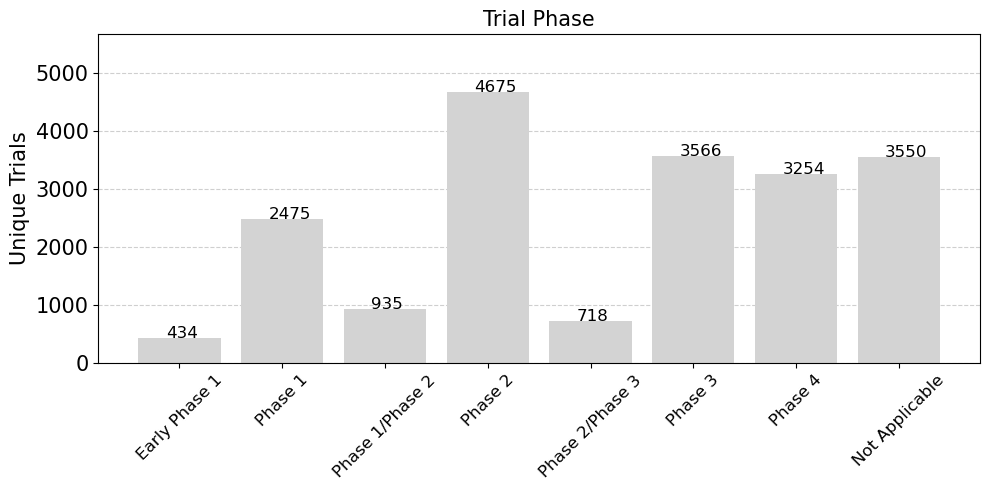

In [47]:
import matplotlib.pyplot as plt

# Defining the order of phases
phase_order = [
    'Early Phase 1', 
    'Phase 1',
    'Phase 1/Phase 2',
    'Phase 2', 
    'Phase 2/Phase 3', 
    'Phase 3', 
    'Phase 4', 
    'Not Applicable'
]

# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'phase']].drop_duplicates()
#unique_pairs_phase['phase'].fillna('Unknown', inplace=True)
#unique_pairs_phase.replace({'': 'Unknown'}, inplace=True)

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()

# Reindexing phase_type_counts based on the phase_order and filling missing values with 0
phase_type_counts = phase_type_counts.reindex(phase_order, fill_value=0)

plt.figure(figsize=(10, 5))
bars = plt.bar(phase_type_counts.index, phase_type_counts, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, height, f'{height}', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)  # Change axis to 'y' for horizontal gridlines
plt.ylabel('Unique Trials', fontsize=15)  # Changed to ylabel
plt.title('Trial Phase', fontsize=15)
plt.ylim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/phase_frequency_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()


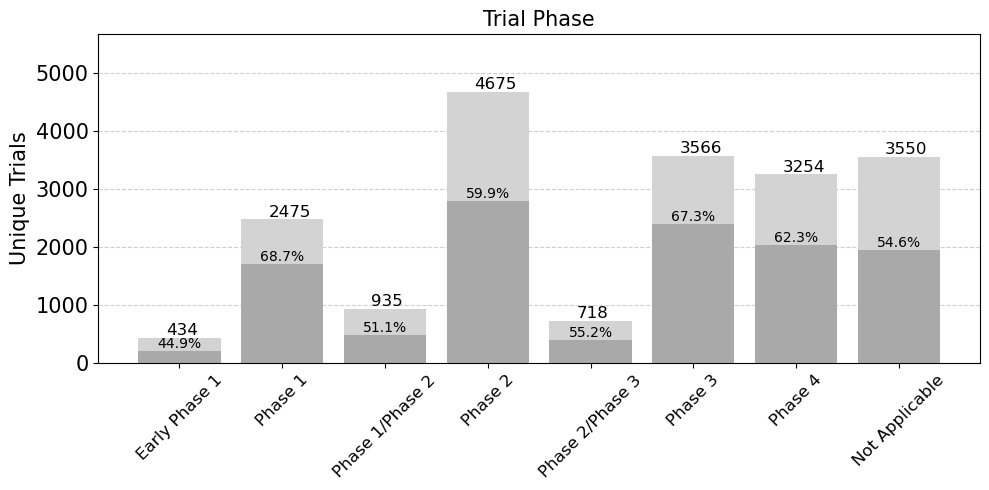

In [375]:
import matplotlib.pyplot as plt

# Defining the order of phases
phase_order = [
    'Early Phase 1', 
    'Phase 1',
    'Phase 1/Phase 2',
    'Phase 2', 
    'Phase 2/Phase 3', 
    'Phase 3', 
    'Phase 4', 
    'Not Applicable'
]

# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_metadata[['nct_id', 'phase', 'overall_status']].drop_duplicates()

# Counting the number of nct_ids per phase type
phase_type_counts = unique_pairs_phase['phase'].value_counts()

# Reindexing phase_type_counts based on the phase_order and filling missing values with 0
phase_type_counts = phase_type_counts.reindex(phase_order, fill_value=0)

# Calculate the count and proportion of completed trials for each phase
completed_count = unique_pairs_phase[unique_pairs_phase['overall_status'] == 'Completed']['phase'].value_counts()
completed_count = completed_count.reindex(phase_order, fill_value=0)

completed_proportion = completed_count / phase_type_counts * 100

plt.figure(figsize=(10, 5))

# Add labels to each bar
for bar, prop in zip(completed_bars, completed_proportion):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{prop:.1f}%', ha='center', va='bottom', fontsize=10)

# Adding bars for total trials
total_bars = plt.bar(phase_type_counts.index, phase_type_counts, color='lightgrey', zorder=2)
completed_bars = plt.bar(completed_count.index, completed_count, color='darkgrey', zorder=2)

# Add labels to each bar
for bar in total_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, height + 50, f'{height}', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)  # Change axis to 'y' for horizontal gridlines
plt.ylabel('Unique Trials', fontsize=15)  # Changed to ylabel
plt.title('Trial Phase', fontsize=15)
plt.ylim(0, max(phase_type_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/completed_by_phase_frequency_{len(unique_pairs_phase)}.pdf')

# Display the chart
plt.show()


### Start/ Completion Years

In [68]:
trial_metadata

,nct_id,start_year,completion_year,phase,overall_status,primary_purpose
0,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
1,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
2,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
3,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
4,NCT00000117,1995.0,1997.0,Phase 3,Completed,Treatment
...,...,...,...,...,...,...
9259555,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259556,NCT06296082,2024.0,2027.0,Phase 2,Not yet recruiting,Treatment
9259670,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention
9259671,NCT06296875,2024.0,2026.0,Not Applicable,Not yet recruiting,Prevention


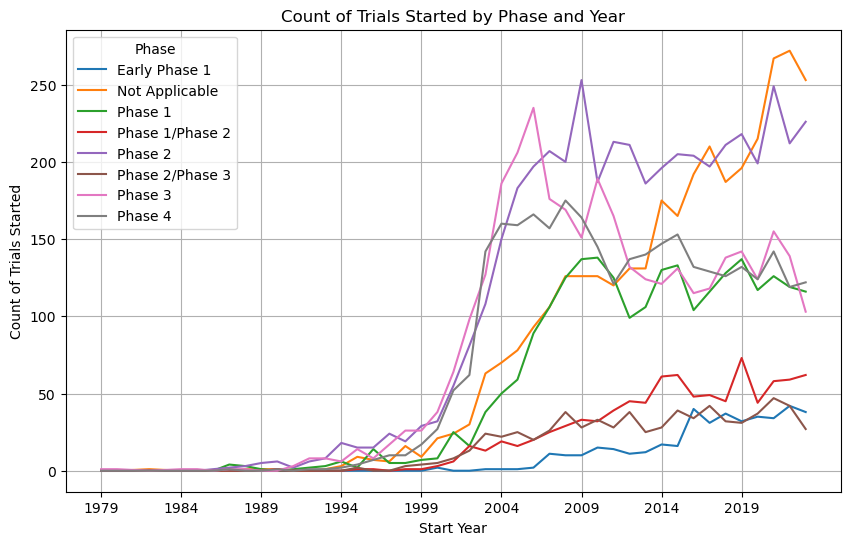

In [89]:
filtered_data = trial_metadata[['nct_id', 'phase', 'start_year']][trial_metadata['start_year'] < 2024].drop_duplicates()

# Grouping data by phase and start year, then counting the number of trials for each group
trial_counts = filtered_data.groupby(['phase', 'start_year']).size().unstack(fill_value=0)

# Plotting the line chart for each phase
plt.figure(figsize=(10, 6))
for phase in trial_counts.index:
    plt.plot(trial_counts.columns, trial_counts.loc[phase], label=phase)

# Adding labels, legend, and title
plt.xlabel('Start Year')
plt.ylabel('Count of Trials Started')
plt.title('Count of Trials Started by Phase and Year')
plt.legend(title='Phase')
plt.grid(True)

# Set x-axis tick labels to every 5 years
plt.xticks(np.arange(min(trial_counts.columns), max(trial_counts.columns)+1, 5))

plt.savefig(f'viz/trial_characteristics/general/phase_over_time_{len(unique_pairs_phase)}.pdf')

# Show plot
plt.show()

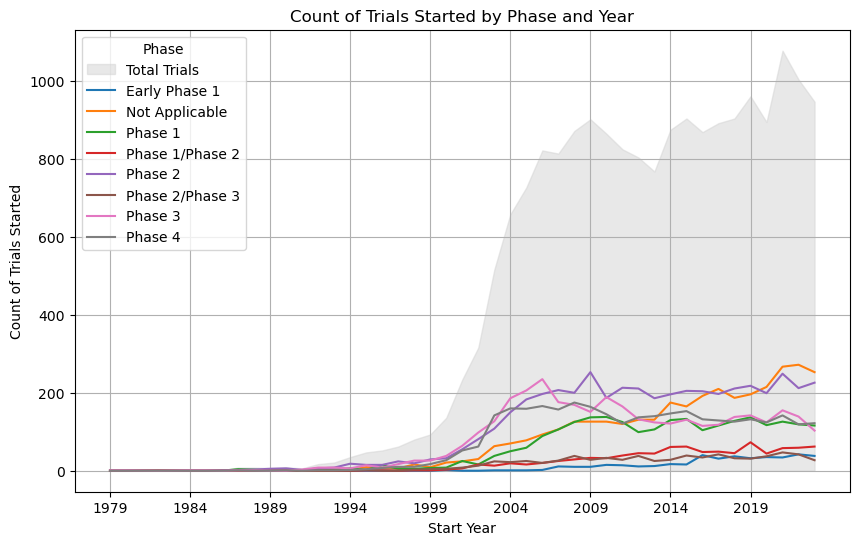

In [88]:
# Assuming 'trial_metadata' and previous preprocessing steps have been properly executed
filtered_data = trial_metadata[['nct_id', 'phase', 'start_year']][trial_metadata['start_year'] < 2024].drop_duplicates()

# Grouping data by phase and start year, then counting the number of trials for each group
trial_counts = filtered_data.groupby(['phase', 'start_year']).size().unstack(fill_value=0)

# Compute the total trials per year across all phases
total_trials_per_year = trial_counts.sum(axis=0)

# Plotting the area chart for total trials in the background
plt.figure(figsize=(10, 6))
plt.fill_between(total_trials_per_year.index, total_trials_per_year, color='lightgray', alpha=0.5, label='Total Trials')

# Plotting the line chart for each phase over the area chart
for phase in trial_counts.index:
    plt.plot(trial_counts.columns, trial_counts.loc[phase], label=phase)

# Adding labels, legend, and title
plt.xlabel('Start Year')
plt.ylabel('Count of Trials Started')
plt.title('Count of Trials Started by Phase and Year')
plt.legend(title='Phase',loc='upper left')
plt.grid(True)

# Set x-axis tick labels to every 5 years
plt.xticks(np.arange(min(trial_counts.columns), max(trial_counts.columns)+1, 5))

# Saving the figure to a PDF file
plt.savefig(f'viz/trial_characteristics/general/phase_over_time_with_total_{len(unique_pairs_phase)}.pdf')

# Show plot
plt.show()

In [431]:
phase_type_counts

phase
Early Phase 1       434
Phase 1            2475
Phase 1/Phase 2       0
Phase 2            4675
Phase 2/Phase 3       0
Phase 3            3566
Phase 4            3254
Not Applicable     3550
Name: count, dtype: int64

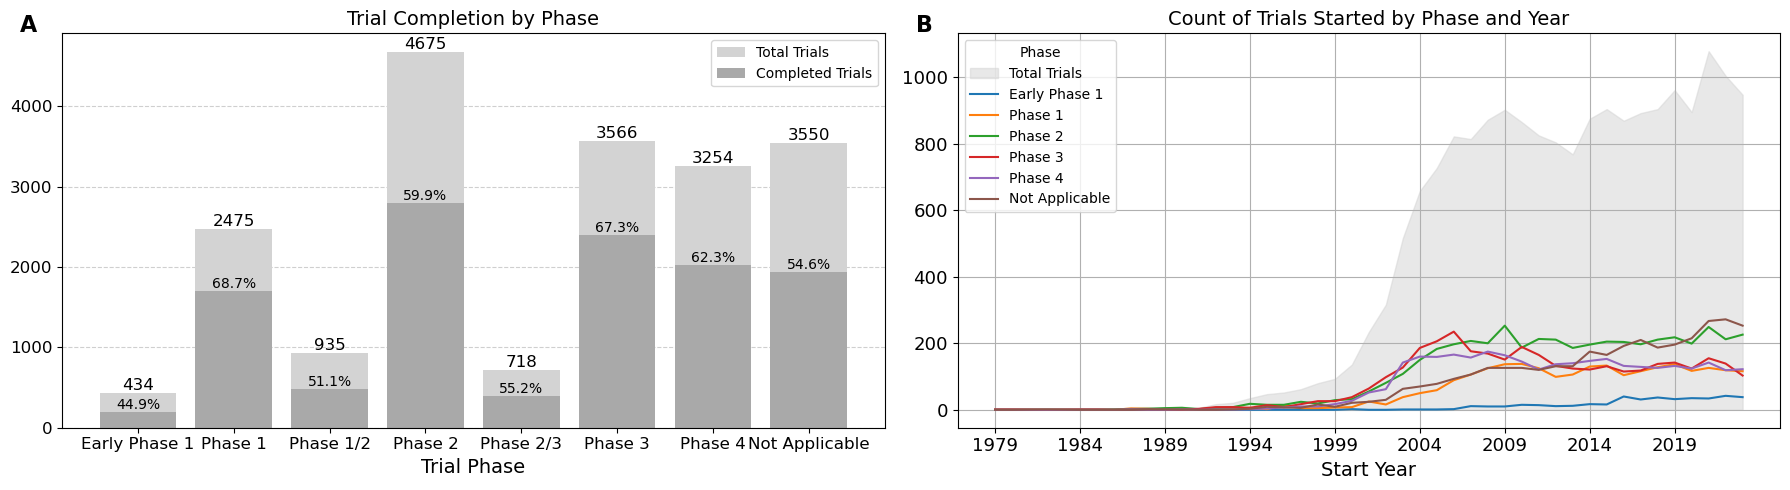

In [685]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming trial_metadata is already loaded and processed

# Define phase order and filter/preprocess the data
phase_order = [
    'Early Phase 1',
    'Phase 1',
    'Phase 1/2',
    'Phase 2',
    'Phase 2/3',
    'Phase 3',
    'Phase 4',
    'Not Applicable'
]

# Filter and count phases and statuses
unique_pairs_phase = trial_metadata[['nct_id', 'phase', 'overall_status']].drop_duplicates()
unique_pairs_phase['phase'] = unique_pairs_phase['phase'].str.replace('/Phase ', '/', regex=False)

phase_type_counts = unique_pairs_phase['phase'].value_counts().reindex(phase_order, fill_value=0)
completed_count = unique_pairs_phase[unique_pairs_phase['overall_status'] == 'Completed']['phase'].value_counts().reindex(phase_order, fill_value=0)
completed_proportion = (completed_count / phase_type_counts * 100).fillna(0)

# Prepare data for the time series plot
filtered_data = trial_metadata[['nct_id', 'phase', 'start_year']][trial_metadata['start_year'] < 2024].drop_duplicates()
trial_counts = filtered_data.groupby(['phase', 'start_year']).size().unstack(fill_value=0)
total_trials_per_year = trial_counts.sum(axis=0)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# First subplot - Completion by phase
total_bars = ax1.bar(phase_type_counts.index, phase_type_counts, color='lightgrey', zorder=2, label='Total Trials')
completed_bars = ax1.bar(completed_count.index, completed_count, color='darkgrey', zorder=2, label='Completed Trials')

# Label the bars
for bar, prop in zip(completed_bars, completed_proportion):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{prop:.1f}%', ha='center', va='bottom', fontsize=10)

for bar in total_bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=12)

ax1.set_xlabel('Trial Phase',fontsize=14)
ax1.set_title('Trial Completion by Phase',fontsize=14)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.text(-0.03, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax1.tick_params(axis='both', labelsize=12)  # Increase tick label size

# Second subplot - Trials over time
ax2.fill_between(total_trials_per_year.index, total_trials_per_year, color='lightgray', alpha=0.5, label='Total Trials')
for phase in phase_order:
    if phase in trial_counts.index:
        ax2.plot(trial_counts.columns, trial_counts.loc[phase], label=phase)

ax2.set_xlabel('Start Year', fontsize=14)
ax2.set_title('Count of Trials Started by Phase and Year',fontsize=14)
ax2.legend(title='Phase', loc='upper left')
ax2.grid(True)
ax2.set_xticks(np.arange(min(trial_counts.columns), max(trial_counts.columns)+1, 5))
ax2.text(-0.03, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax2.tick_params(axis='both', labelsize=13)  # Increase tick label size
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Optionally save the figure to a local folder
fig.savefig('viz/trial_characteristics/general/trials_phase_and_over_time.png')


In [ ]:
ax2.set_title('Overall Trial Status', fontsize=14)
ax2.set_xlabel('Count of Unique Trials', fontsize=14)
ax2.set_xlim(0, max(status_type_counts)+1000)  # Adjusting the x limits for visibility
ax2.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
ax2.set_xlim(0, max(status_type_counts)+1500) # Adjusted to max count for relevancy
ax2.tick_params(axis='both', labelsize=13)  # Increase tick label size

## Design Characteristics

In [81]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [573]:
trial_design = df[['nct_id','allocation', 'masking', 'number_of_primary_outcomes_to_measure', 'number_of_secondary_outcomes_to_measure', 'number_of_other_outcomes_to_measure','number_of_facilities', 'country', 'country_name']]

In [574]:
trial_design.fillna('not reported', inplace=True)
trial_design

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/27152776.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'not reported' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/27152776.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nct_id,allocation,masking,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,number_of_facilities,country,country_name
0,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
1,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
2,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
3,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
4,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
...,...,...,...,...,...,...,...,...,...
9259555,NCT06296082,Randomized,Double,1.0,11.0,3.0,not reported,not reported,not reported
9259556,NCT06296082,Randomized,Double,1.0,11.0,3.0,not reported,not reported,not reported
9259670,NCT06296875,Randomized,Triple,3.0,16.0,not reported,1.0,United Kingdom,United Kingdom
9259671,NCT06296875,Randomized,Triple,3.0,16.0,not reported,1.0,United Kingdom,United Kingdom


### Allocation and Masking

In [575]:
set(trial_design['allocation'])

{'Non-Randomized', 'Randomized', 'not reported'}

In [576]:
set(trial_design['masking'])

{'Double',
 'None (Open Label)',
 'Quadruple',
 'Single',
 'Triple',
 'not reported'}

19607


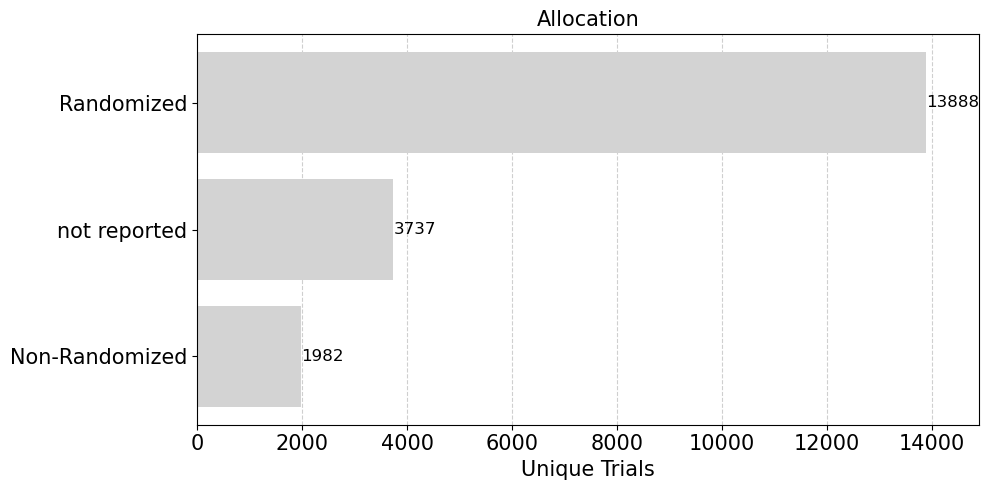

In [577]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_design[['nct_id', 'allocation']].drop_duplicates()

# Counting the number of nct_ids per phase type
allocation_counts = unique_pairs_phase['allocation'].value_counts()
allocation_counts = allocation_counts.sort_values(ascending=True)
print(sum(allocation_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(allocation_counts.index, allocation_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Allocation', fontsize=15)
plt.xlim(0, max(allocation_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/allocation_frequency.png')

# Display the chart
plt.show()

19607


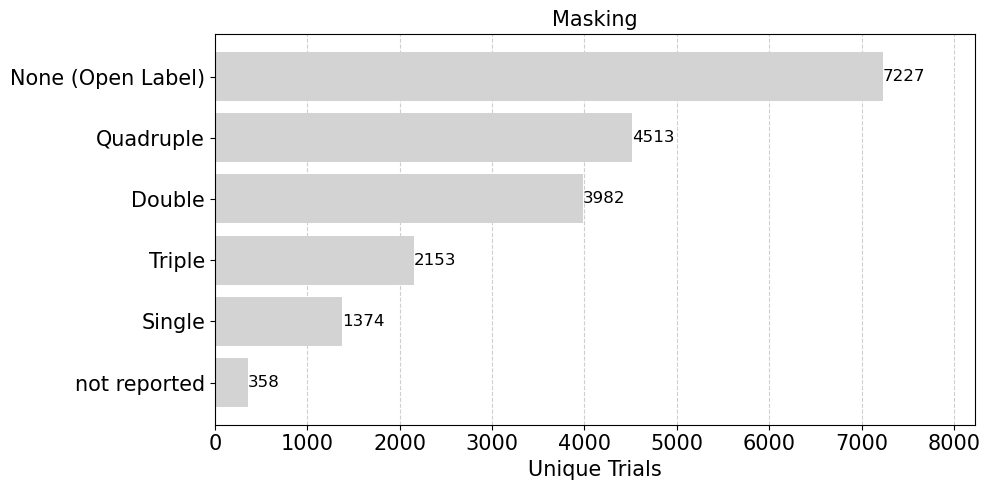

In [578]:
# Keeping only unique nct_id, phase pairs
unique_pairs_phase = trial_design[['nct_id', 'masking']].drop_duplicates()

# Counting the number of nct_ids per phase type
masking_counts = unique_pairs_phase['masking'].value_counts()
masking_counts = masking_counts.sort_values(ascending=True)
print(sum(masking_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(masking_counts.index, masking_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Unique Trials', fontsize=15)
plt.title('Masking', fontsize=15)
plt.xlim(0, max(masking_counts)+1000) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/masking_frequency.png')

# Display the chart
plt.show()

In [579]:
sum(allocation_counts), sum(masking_counts)

(19607, 19607)

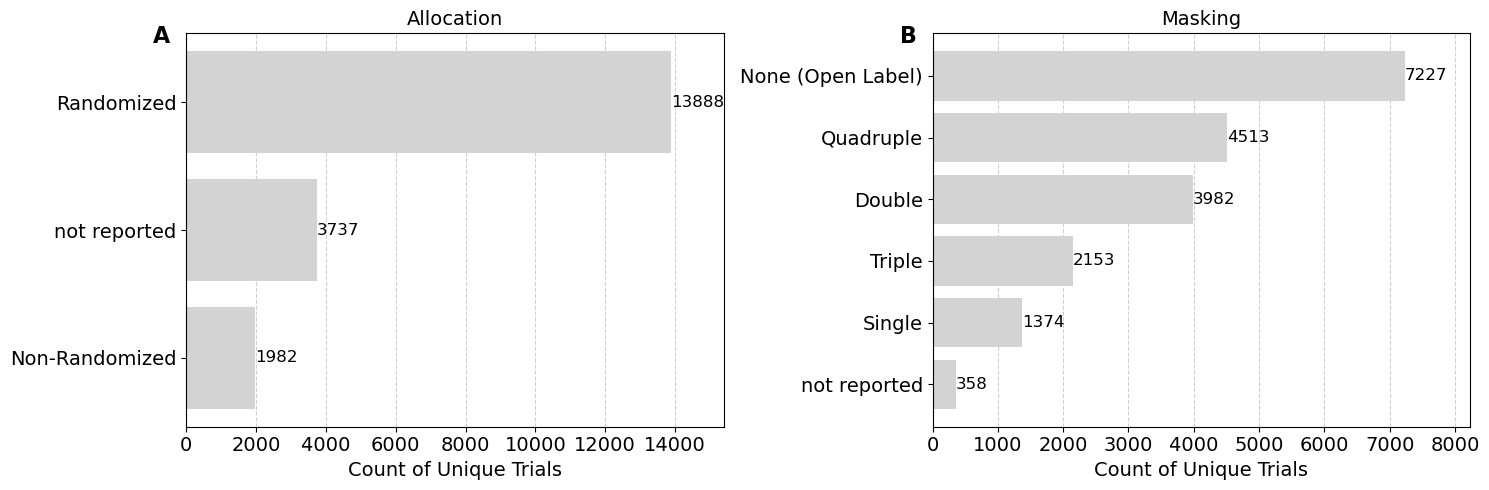

In [580]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Allocation
bars_0 = axs[0].barh(allocation_counts.index, allocation_counts, color='lightgrey', zorder=2)
for bar in bars_0:
    width = bar.get_width()
    axs[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[0].set_xlabel('Count of Unique Trials', fontsize=14)
axs[0].set_title('Allocation', fontsize=14)
axs[0].set_xlim(0, max(allocation_counts)+1500) # Adjusted to max count for relevancy
axs[0].text(-0.03, 1.02, 'A', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plot for Masking
bars_1 = axs[1].barh(masking_counts.index, masking_counts, color='lightgrey', zorder=2)
for bar in bars_1:
    width = bar.get_width()
    axs[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[1].set_xlabel('Count of Unique Trials', fontsize=14)
axs[1].set_title('Masking', fontsize=14)
axs[1].set_xlim(0, max(masking_counts)+1000) # Adjusted to max count for relevancy
axs[1].text(-0.03, 1.02, 'B', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Adjust layout
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/allocation_and_masking_frequency.pdf')

# Display the plots
plt.show()


### Number of Facilities

In [581]:
trial_design.columns

Index(['nct_id', 'allocation', 'masking',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'number_of_facilities',
       'country', 'country_name'],
      dtype='object')

In [659]:
unique_pairs_facilities = trial_design[['nct_id', 'number_of_facilities']].drop_duplicates()
unique_pairs_facilities

,nct_id,number_of_facilities
0,NCT00000117,2.0
17,NCT00000146,15.0
107,NCT00000147,15.0
197,NCT00000151,not reported
205,NCT00000170,1.0
...,...,...
9259445,NCT06293911,1.0
9259456,NCT06294236,not reported
9259477,NCT06294821,not reported
9259545,NCT06296082,not reported


In [662]:
unique_pairs_facilities['number_of_facilities'] = pd.to_numeric(unique_pairs_facilities['number_of_facilities'], errors='coerce')

len(unique_pairs_facilities[unique_pairs_facilities["number_of_facilities"]>100])

286

In [663]:
unique_pairs_facilities[unique_pairs_facilities["number_of_facilities"]>100]

,nct_id,number_of_facilities
7668,NCT00002594,118.0
19854,NCT00002944,204.0
40691,NCT00003573,106.0
51491,NCT00003935,110.0
69023,NCT00006024,235.0
...,...,...
8971675,NCT05518123,130.0
8977584,NCT05523167,121.0
9163819,NCT05929066,141.0
9212536,NCT06079190,104.0


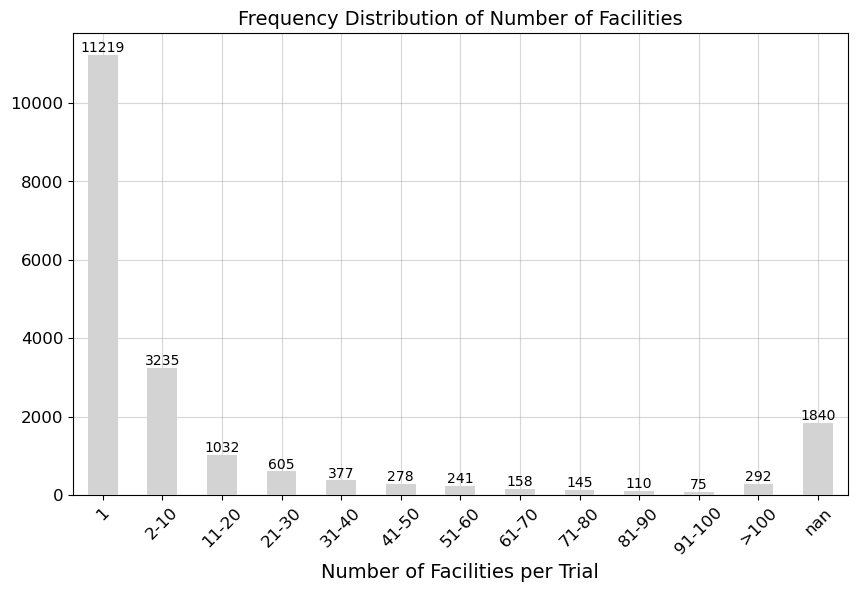

(None,
 binned
 1         11219.0
 2-10       3235.0
 11-20      1032.0
 21-30       605.0
 31-40       377.0
 41-50       278.0
 51-60       241.0
 61-70       158.0
 71-80       145.0
 81-90       110.0
 91-100       75.0
 >100        292.0
 NaN        1840.0
 Name: count, dtype: float64)

In [658]:
# Convert the 'number_of_facilities' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_facilities['number_of_facilities'] = pd.to_numeric(unique_pairs_facilities['number_of_facilities'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '>100']

# Bin the data
unique_pairs_facilities['binned'] = pd.cut(unique_pairs_facilities['number_of_facilities'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts = unique_pairs_facilities['binned'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts[np.nan] = len(unique_pairs_facilities[unique_pairs_facilities['number_of_facilities'].isna()])

# Plot

plt.figure(figsize=(10, 6))

ax = bin_counts.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
plt.title('Frequency Distribution of Number of Facilities', fontsize=14)
plt.xlabel('Number of Facilities per Trial', fontsize=14)
#plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

plt.savefig(f'viz/trial_characteristics/design/nr_facilities_per_trial.pdf')

plt.show(), bin_counts

In [585]:
import plotly
import plotly.express as px
import plotly.graph_objects as go


In [601]:
unique_pairs_facility_countries = trial_design[['nct_id', 'country']].drop_duplicates()
unique_pairs_facility_countries['country'] = unique_pairs_facility_countries['country'].replace({'United States': 'United States of America'})
unique_pairs_facility_countries['country'] = unique_pairs_facility_countries['country'].replace({'Russian Federation': 'Russia'})
unique_pairs_facility_countries['country'] = unique_pairs_facility_countries['country'].replace({'Korea, Republic of': 'South Korea'})

unique_pairs_facility_countries


,nct_id,country
0,NCT00000117,United States of America
17,NCT00000146,United States of America
107,NCT00000147,United States of America
197,NCT00000151,not reported
205,NCT00000170,United States of America
...,...,...
9259445,NCT06293911,Italy
9259456,NCT06294236,not reported
9259477,NCT06294821,not reported
9259545,NCT06296082,not reported


In [602]:
unique_pairs_facility_countries


,nct_id,country
0,NCT00000117,United States of America
17,NCT00000146,United States of America
107,NCT00000147,United States of America
197,NCT00000151,not reported
205,NCT00000170,United States of America
...,...,...
9259445,NCT06293911,Italy
9259456,NCT06294236,not reported
9259477,NCT06294821,not reported
9259545,NCT06296082,not reported


In [603]:
# Group by 'nct_id' and count unique countries
trial_country_counts = unique_pairs_facility_countries.groupby('nct_id')['country'].nunique()

# Filter to include only those trials with facilities in more than one country
multi_country_trials = trial_country_counts[trial_country_counts > 1]
single_country_trials = trial_country_counts[trial_country_counts == 1]

# Calculate the average number of unique countries per trial
average_countries = multi_country_trials.mean()
average_countries

6.752700617283951

In [606]:
len(single_country_trials), len(multi_country_trials)

(17015, 2592)

In [589]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world['name'].unique())
len(world['name'].unique())


['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jordan'
 'United Arab Emirates' 'Qatar' 'Kuwait'

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/2730037189.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



177

In [590]:
df_filtered = unique_pairs_facility_countries[unique_pairs_facility_countries['country'] != 'not reported']
df_filtered.country.nunique()


136

In [591]:
import contextily as ctx
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
#from matplotlib.cm import ScalarMappable, cmap

In [592]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/1391380840.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



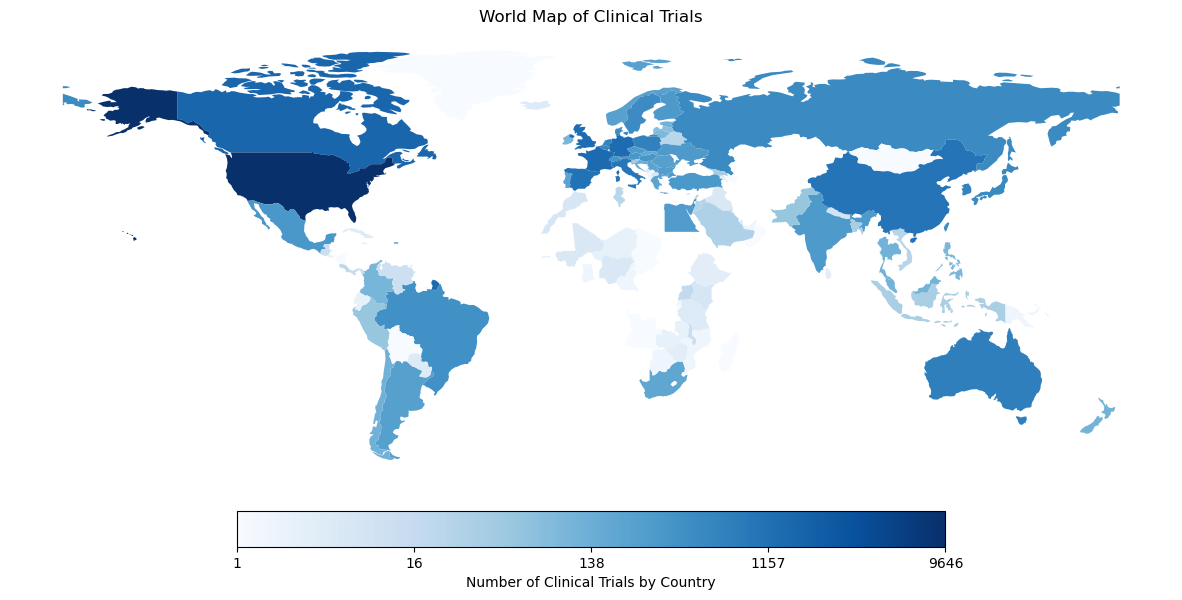

In [609]:
# Count the number of facilities per country
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world GeoDataFrame with the country counts DataFrame
world = world.merge(country_counts, how="left", left_on="name", right_on="country")

# Apply a logarithmic transformation to the 'Frequency' column to deal with wide ranges in data
world['log_count'] = np.log1p(world['count'])

# Ensure that areas with zero (log1p(0) = 0) are left white by treating them as NaN
world['log_count'] = world['log_count'].replace(0, np.nan)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = world.plot(ax=ax, column='log_count', cmap='Blues', legend=False, legend_kwds={'label': "Number of Clinical Trials by Country", 'orientation': "horizontal"})
#ctx.add_basemap(ax, crs=world.crs.to_string(), source=ctx.providers.Stamen.Terrain)
ax.set_axis_off()
plt.title('World Map of Clinical Trials')

# Create a custom colorbar
norm = Normalize(vmin=world['log_count'].min(), vmax=world['log_count'].max())
sm = ScalarMappable(cmap='Blues', norm=norm)
sm._A = []  # Fake up the array of the scalar mappable. Urgh...
cb = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cb.set_label('Number of Clinical Trials by Country')

# Format the ticks to show the actual counts
tick_locs = np.linspace(world['log_count'].min(), world['log_count'].max(), num=5)
cb.set_ticks(tick_locs)
cb.set_ticklabels((np.exp(tick_locs) - 1).round().astype(int))  # Convert log count back to count


# Save the figure as a PDF
plt.savefig('viz/trial_characteristics/general/clinical_trials_world_map.pdf', format='pdf')

# Show the plot
plt.show()

In [620]:
from matplotlib import gridspec


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/2371485748.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



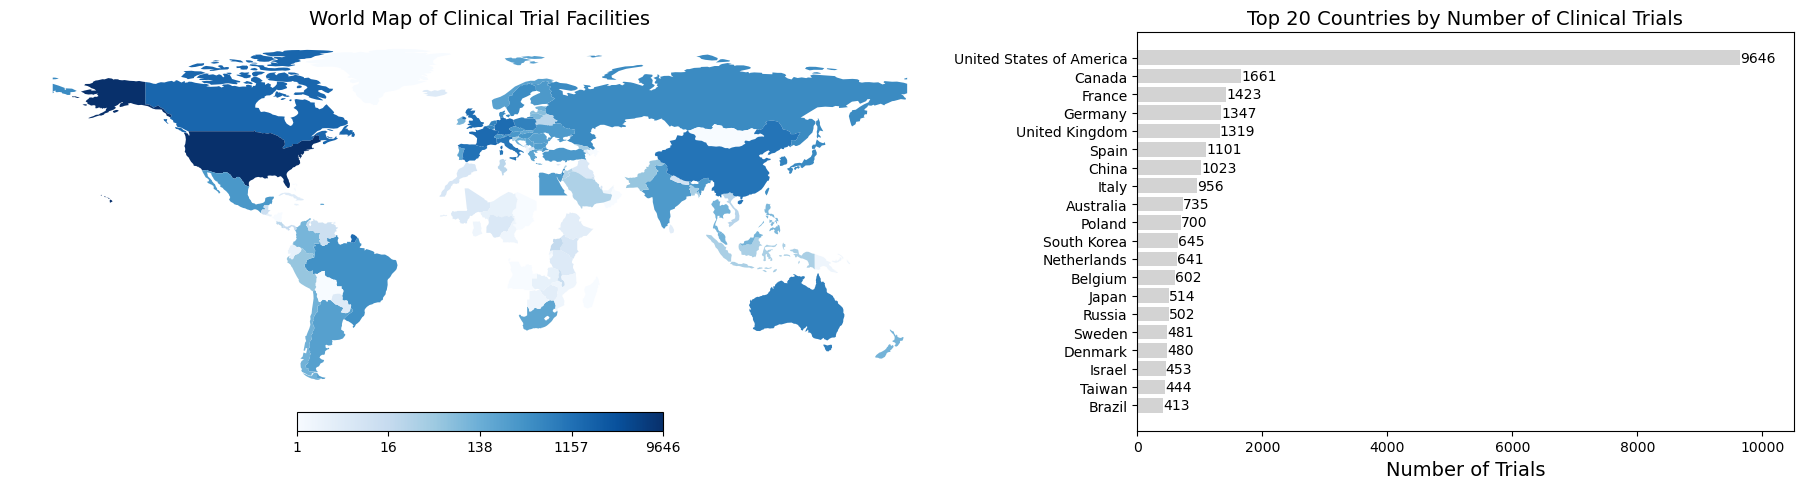

In [649]:
# Count the number of facilities per country
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world GeoDataFrame with the country counts DataFrame
world = world.merge(country_counts, how="left", left_on="name", right_on="country")

# Apply a logarithmic transformation to the 'count' column to deal with wide ranges in data
world['log_count'] = np.log1p(world['count'])

# Ensure that areas with zero (log1p(0) = 0) are left white by treating them as NaN
world['log_count'] = world['log_count'].replace(0, np.nan)

# Set up the figure and grid spec
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])  # Adjust the width ratio to favor the map

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plotting the world map (assuming world and log_count are already defined)
base = world.plot(ax=ax1, column='log_count', cmap='Blues', legend=False)
ax1.set_title('World Map of Clinical Trial Facilities', fontsize=14)
ax1.set_axis_off()

# Create a custom colorbar for the map
norm = Normalize(vmin=world['log_count'].min(), vmax=world['log_count'].max())
sm = ScalarMappable(cmap='Blues', norm=norm)
sm._A = []
cb = plt.colorbar(sm, ax=ax1, orientation='horizontal', fraction=0.046, pad=0.04)
#cb.set_label('Number of Clinical Trial Facilities by Country', fontsize=14)
tick_locs = np.linspace(world['log_count'].min(), world['log_count'].max(), num=5)
cb.set_ticks(tick_locs)
cb.set_ticklabels((np.exp(tick_locs) - 1).round().astype(int))

# Adjustments for the bar chart to sort by most frequent and select the top 20 countries
top_countries = country_counts.sort_values(by='count', ascending=False).head(20)
ax2.barh(top_countries['country'], top_countries['count'], color='lightgrey')
ax2.set_title('Top 20 Countries by Number of Clinical Trials', fontsize=14)
ax2.set_xlabel('Number of Trials', fontsize=14)
ax2.invert_yaxis()  # Invert the y-axis to have the country with the most trials on top
ax2.set_xlim(0, 10500) # Adjusted to max count for relevancy

# Label the bars with their respective counts
for index, value in enumerate(top_countries['count']):
    ax2.text(value, index, f'{value}', va='center')

# Adjust layout to prevent overlap and ensure good proportion between subplots
plt.tight_layout()
fig.subplots_adjust(wspace=0.001)  # Adjust the width space between the subplots

# Save the figure as a PDF
plt.savefig('viz/trial_characteristics/general/clinical_trials_world_map_and_bar_chart.pdf',  bbox_inches='tight', pad_inches=0.1)


# Show the plot
plt.show()

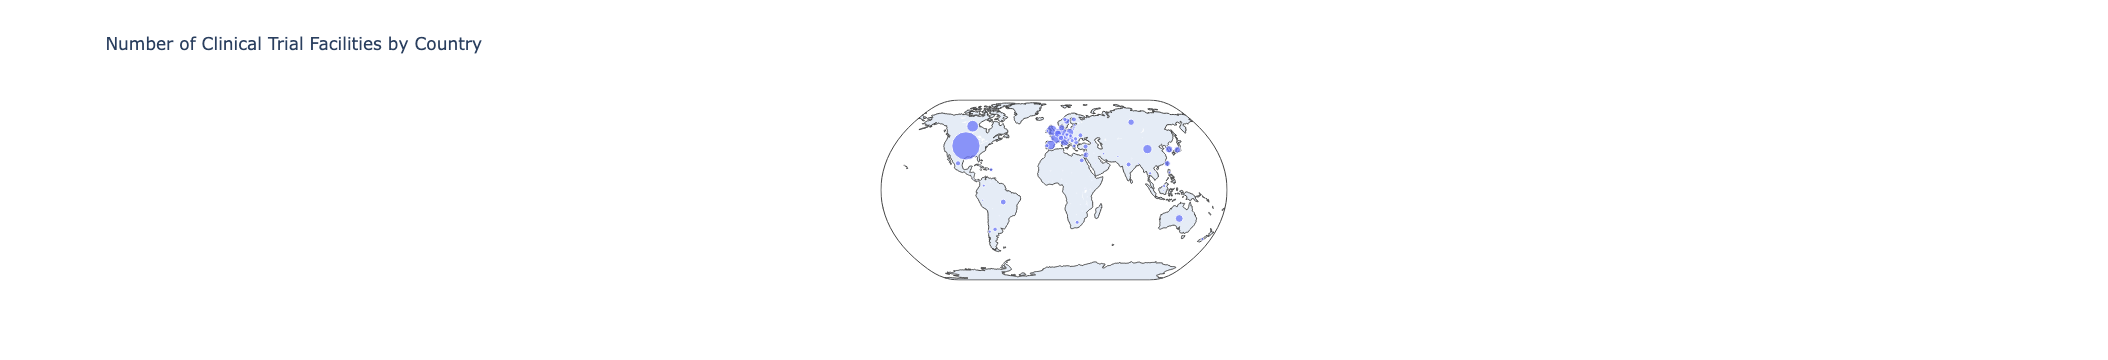

In [616]:
# Filter out rows where the country is 'not reported'

# Count the number of facilities per country
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Plotting the data on a world map
fig = px.scatter_geo(country_counts,
                     locations="country",
                     locationmode='country names',
                     size="count",
                     hover_name="country",
                     projection="natural earth",
                     title="Number of Clinical Trial Facilities by Country")

fig.show()

### Number of Outcomes

In [676]:
trial_design.head()

,nct_id,allocation,masking,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,number_of_facilities,country,country_name
0,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
1,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
2,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
3,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States
4,NCT00000117,Randomized,Double,not reported,not reported,not reported,2.0,United States,United States


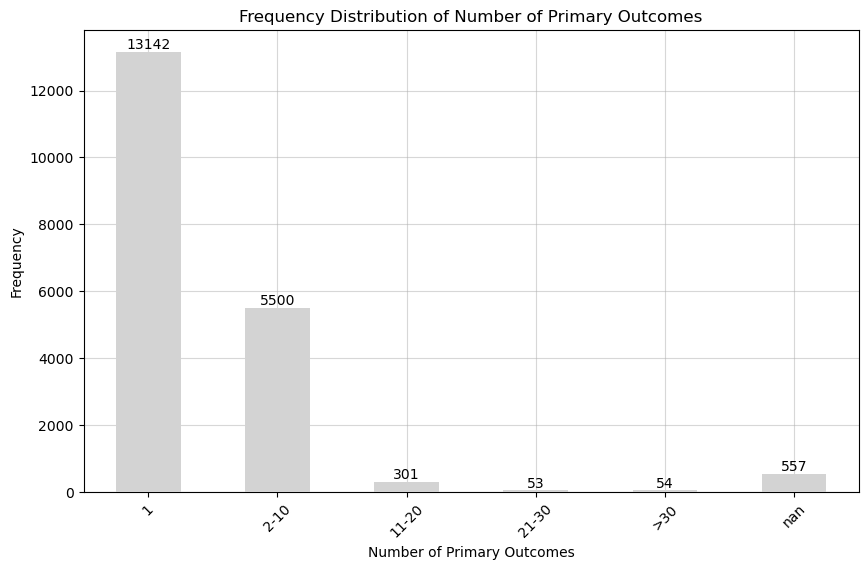

(None,
 binned_primary_outcomes
 1        13142.0
 2-10      5500.0
 11-20      301.0
 21-30       53.0
 >30         54.0
 NaN        557.0
 Name: count, dtype: float64)

In [677]:
unique_pairs_primary_outocome = trial_design[['nct_id', 'number_of_primary_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_primary_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'] = pd.to_numeric(unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'], errors='coerce')

# Define the bins and labels up to >30
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']


# Bin the data
unique_pairs_primary_outocome['binned_primary_outcomes'] = pd.cut(unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_primary_outcomes = unique_pairs_primary_outocome['binned_primary_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_primary_outcomes[np.nan] = len(unique_pairs_primary_outocome[unique_pairs_primary_outocome['number_of_primary_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_primary_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_primary_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of Primary Outcomes')
plt.xlabel('Number of Primary Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_primary_outcomes_frequency.png')

plt.show(), bin_counts_primary_outcomes


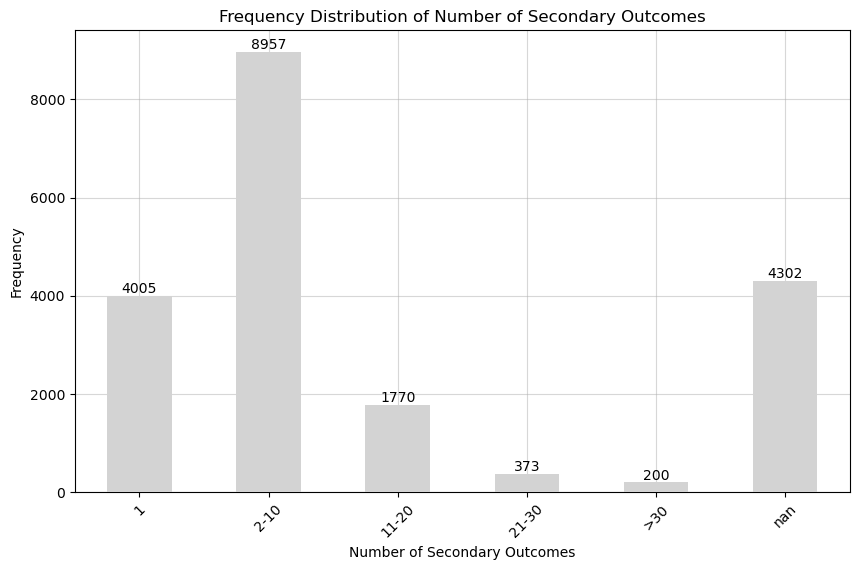

(None,
 binned_secondary_outcomes
 1        4005.0
 2-10     8957.0
 11-20    1770.0
 21-30     373.0
 >30       200.0
 NaN      4302.0
 Name: count, dtype: float64)

In [678]:
unique_pairs_secondary_outocome = trial_design[['nct_id', 'number_of_secondary_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_secondary_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'] = pd.to_numeric(unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']

# Bin the data
unique_pairs_secondary_outocome['binned_secondary_outcomes'] = pd.cut(unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_secondary_outcomes = unique_pairs_secondary_outocome['binned_secondary_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_secondary_outcomes[np.nan] = len(unique_pairs_secondary_outocome[unique_pairs_secondary_outocome['number_of_secondary_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_secondary_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_secondary_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of Secondary Outcomes')
plt.xlabel('Number of Secondary Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_secondary_outcomes_frequency.png')

plt.show(), bin_counts_secondary_outcomes


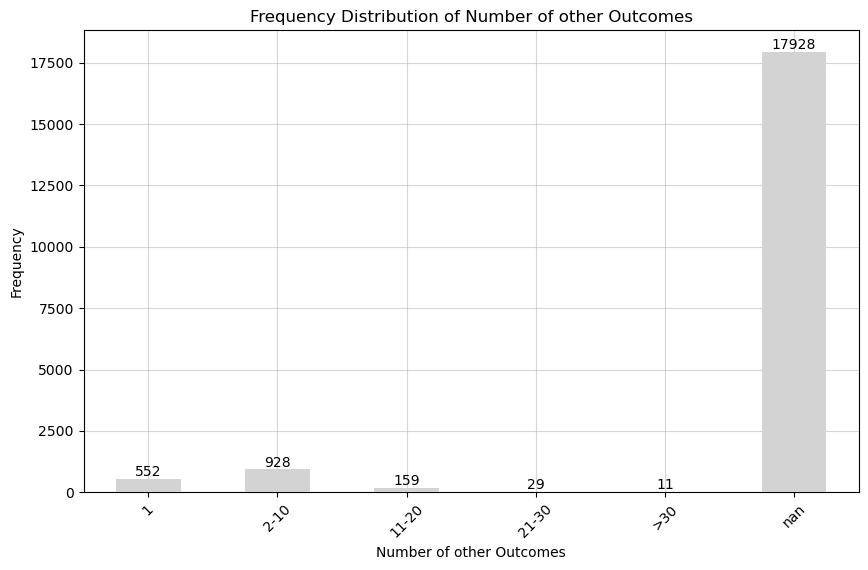

(None,
 binned_other_outcomes
 1          552.0
 2-10       928.0
 11-20      159.0
 21-30       29.0
 >30         11.0
 NaN      17928.0
 Name: count, dtype: float64)

In [679]:
unique_pairs_other_outocome = trial_design[['nct_id', 'number_of_other_outcomes_to_measure']].drop_duplicates()

# Convert the 'number_of_other_outcomes_to_measure' column to numeric, setting errors='coerce' to handle 'not reported' values
unique_pairs_other_outocome['number_of_other_outcomes_to_measure'] = pd.to_numeric(unique_pairs_other_outocome['number_of_other_outcomes_to_measure'], errors='coerce')

# Define the bins and labels
bins = [0, 2, 10, 20, 30, np.inf]
labels = ['1', '2-10', '11-20', '21-30', '>30']

# Bin the data
unique_pairs_other_outocome['binned_other_outcomes'] = pd.cut(unique_pairs_other_outocome['number_of_other_outcomes_to_measure'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin including NaN for 'not reported'
bin_counts_other_outcomes = unique_pairs_other_outocome['binned_other_outcomes'].value_counts().reindex(labels + [np.nan]).fillna(0)
bin_counts_other_outcomes[np.nan] = len(unique_pairs_other_outocome[unique_pairs_other_outocome['number_of_other_outcomes_to_measure'].isna()])

# Plot
plt.figure(figsize=(10, 6))

ax = bin_counts_other_outcomes.plot(kind='bar', color='lightgrey', zorder=3)
# Adding the text labels on the bars
for i, value in enumerate(bin_counts_other_outcomes):
    ax.text(i, value + 0.1, str(int(value)), ha='center', va='bottom')

plt.title('Frequency Distribution of Number of other Outcomes')
plt.xlabel('Number of other Outcomes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)

plt.savefig(f'viz/trial_characteristics/design/nr_other_outcomes_frequency.png')

plt.show(), bin_counts_other_outcomes

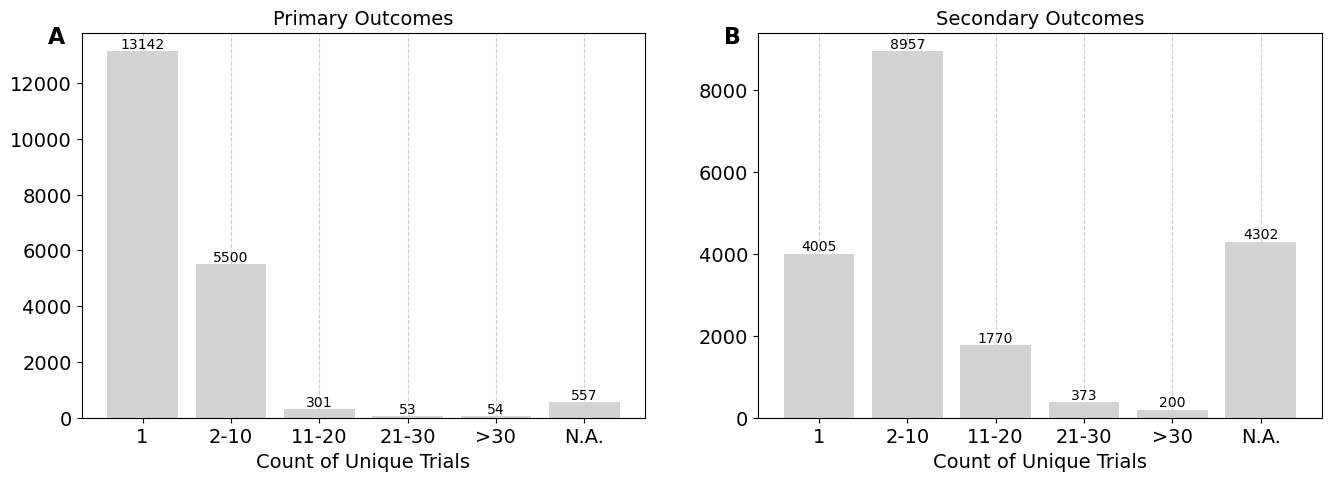

In [680]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

bin_counts_primary_outcomes = bin_counts_primary_outcomes.rename(index={pd.NA: 'N.A.'})
bin_counts_primary_outcomes.index = bin_counts_primary_outcomes.index.fillna('N.A.').astype(str)
# Plot for Allocation
bars_0 = axs[0].bar(bin_counts_primary_outcomes.index, bin_counts_primary_outcomes, color='lightgrey', zorder=2)

for i, value in enumerate(bin_counts_primary_outcomes):
    axs[0].text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
axs[0].tick_params(axis='y', labelsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[0].set_xlabel('Count of Unique Trials', fontsize=14)
axs[0].set_title('Primary Outcomes', fontsize=14)
axs[0].text(-0.03, 1.02, 'A', transform=axs[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
bin_counts_secondary_outcomes = bin_counts_secondary_outcomes.rename(index={pd.NA: 'N.A.'})
bin_counts_secondary_outcomes.index = bin_counts_secondary_outcomes.index.fillna('N.A.').astype(str)
# Plot for Allocation
bars_1 = axs[1].bar(bin_counts_secondary_outcomes.index, bin_counts_secondary_outcomes, color='lightgrey', zorder=2)

for i, value in enumerate(bin_counts_secondary_outcomes):
    axs[1].text(i, value + 0.1, str(int(value)), ha='center', va='bottom')
    
axs[1].tick_params(axis='y', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)
axs[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
axs[1].set_xlabel('Count of Unique Trials', fontsize=14)
axs[1].set_title('Secondary Outcomes', fontsize=14)
axs[1].text(-0.03, 1.02, 'B', transform=axs[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/design/outcomes_primary_secondary_number_frequency.pdf')

# Display the plots
plt.show()


## Funding and Locations

In [665]:
df.columns

Index(['nct_id', 'start_date', 'completion_date', 'phase', 'overall_status',
       'country_name', 'primary_purpose', 'allocation', 'masking',
       'number_of_facilities', 'were_results_reported',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure',
       'number_of_other_outcomes_to_measure', 'agency_class',
       'lead_or_collaborator', 'sponsor_name', 'facility_name', 'country',
       'start_year', 'completion_year'],
      dtype='object')

In [666]:
df_funding = df[['nct_id', 'start_year', 'agency_class', 'lead_or_collaborator', 'sponsor_name']].drop_duplicates()

In [667]:
df_funding.shape

(31457, 5)

Note: we filter to the lead funding.

In [668]:
df_funding = df_funding[df_funding['lead_or_collaborator']=='lead']

# Define a function to replace agency_class based on sponsor_name
def replace_agency_class(row):
    if 'university' in row['sponsor_name'].lower() or ('universita' in row['sponsor_name'].lower()) or ('université' in row['sponsor_name'].lower()) or ('universität' in row['sponsor_name'].lower()) or ('universiteit' in row['sponsor_name'].lower())or ('universidad' in row['sponsor_name'].lower()):
        return 'UNIVERSITY'
    elif 'hospital' in row['sponsor_name'].lower():
        return 'HOSPITAL'
    else:
        return row['agency_class']

# Apply the function
df_funding['agency_class'] = df_funding.apply(replace_agency_class, axis=1)
df_funding[df_funding['agency_class']=='OTHER']

,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name
205,NCT00000170,1999.0,OTHER,lead,Jaeb Center for Health Research
1881,NCT00000212,1987.0,OTHER,lead,New York State Psychiatric Institute
1887,NCT00000213,1990.0,OTHER,lead,New York State Psychiatric Institute
1893,NCT00000214,1992.0,OTHER,lead,New York State Psychiatric Institute
2097,NCT00000270,1995.0,OTHER,lead,New York State Psychiatric Institute
...,...,...,...,...,...
9258033,NCT06276374,2024.0,OTHER,lead,Woo-Keun Seo
9258036,NCT06276504,2024.0,OTHER,lead,Assistance Publique - Hôpitaux de Paris
9258246,NCT06280092,2024.0,OTHER,lead,Sanjeet S. Grewal
9258340,NCT06281925,2024.0,OTHER,lead,NYU Langone Health


In [669]:
df_funding[df_funding['agency_class']=='OTHER'].to_csv("funding_other.csv")

19607


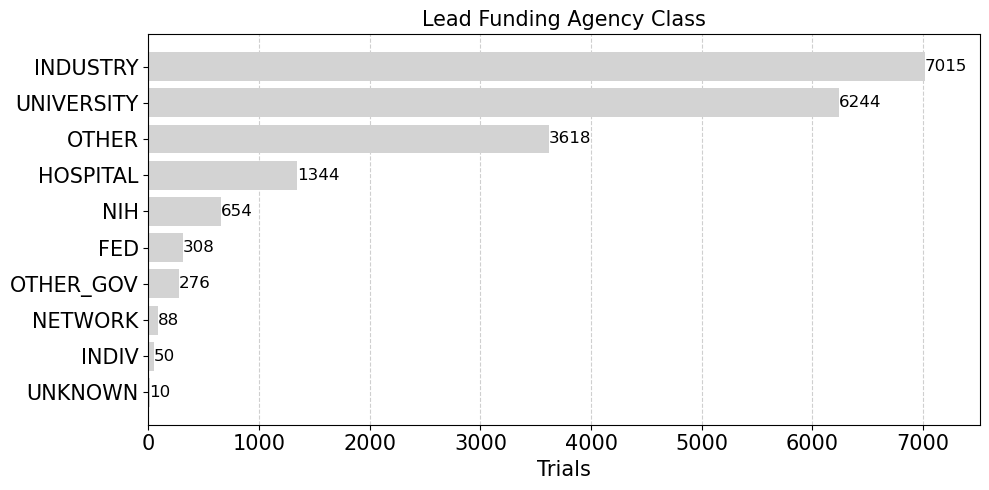

In [670]:
# Counting the number of nct_ids per phase type
funding_counts = df_funding['agency_class'].value_counts()
funding_counts = funding_counts.sort_values(ascending=True)
print(sum(funding_counts))

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 5))
bars = plt.barh(funding_counts.index, funding_counts, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.xlabel('Trials', fontsize=15)
plt.title('Lead Funding Agency Class', fontsize=15)
plt.xlim(0, max(funding_counts)+500) # Adjusted to max count for relevancy
plt.tight_layout()

# Save the plot to a local folder
plt.savefig(f'viz/trial_characteristics/general/lead_funding_agency_{len(df_funding)}.pdf')

# Display the chart
plt.show()

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_59923/3572351226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



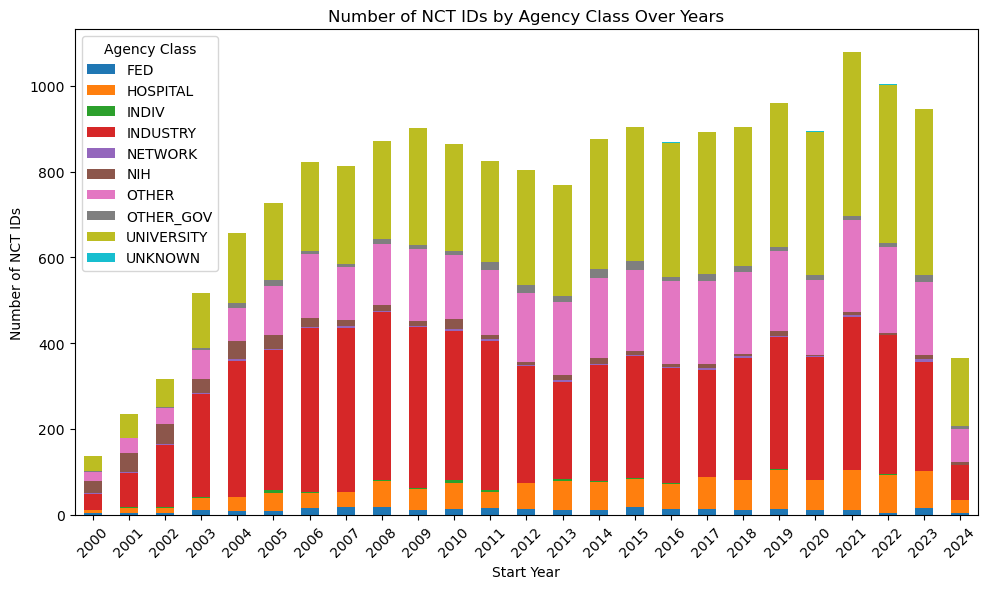

In [671]:
df_filtered = df_funding[(df_funding['start_year'] >= 2000) & (df_funding['start_year'] <= 2024)]
df_filtered['start_year'] = df_filtered['start_year'].astype(int)

pivot_table = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)

# Plotting the pivot table
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))  # You can also try kind='line' for a line plot
ax.set_title('Number of NCT IDs by Agency Class Over Years')
ax.set_xlabel('Start Year')
ax.set_ylabel('Number of NCT IDs')
plt.xticks(rotation=45)
plt.legend(title='Agency Class')
plt.tight_layout()  # Adjust subplots to give some room for the labels

# Show the plot
plt.show()

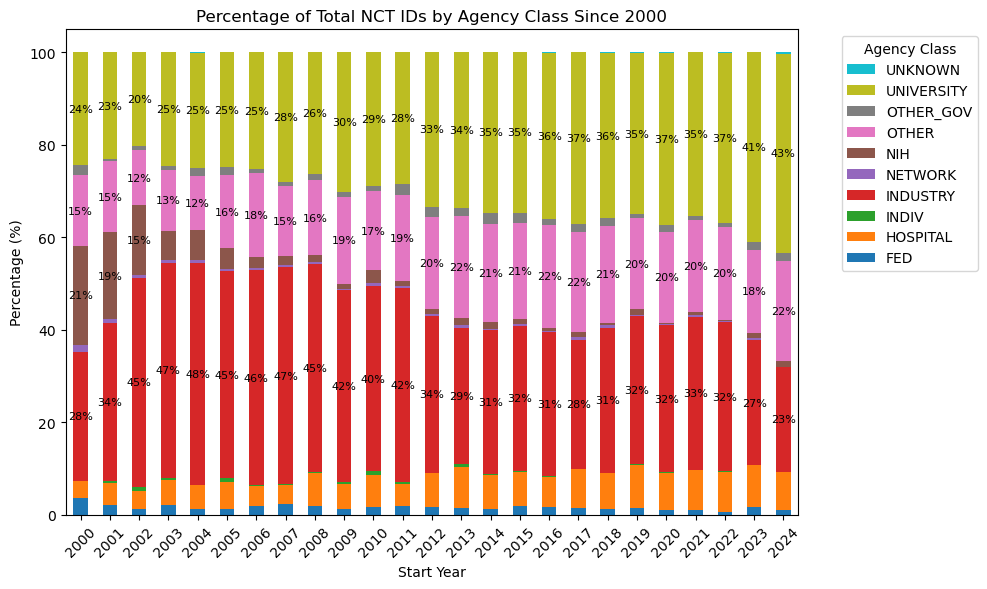

In [672]:
# Creating a pivot table with counts per agency_class and year
pivot_table_counts = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)

# Calculate the total for each year
total_per_year = pivot_table_counts.sum(axis=1)

# Calculate percentages and normalize to 100%
pivot_table_percentage = pivot_table_counts.divide(total_per_year, axis=0) * 100

# Verify the percentages sum to 100% per year
#print(pivot_table_percentage.sum(axis=1))  # This should print 100 for each year

fig, ax = plt.subplots(figsize=(10, 6))

bars = pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, legend=False)
ax.set_title('Percentage of Total NCT IDs by Agency Class Since 2000')
ax.set_xlabel('Start Year')
ax.set_ylabel('Percentage (%)')

# Get handles and labels, reverse them, and then apply them to the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Agency Class', bbox_to_anchor=(1.05, 1), loc='upper left')

#ax.legend(title='Agency Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding text inside the bars
for bars_stack in bars.containers:
    ax.bar_label(bars_stack, labels=[f'{v:.0f}%' if v > 10 else '' for v in bars_stack.datavalues], label_type='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'viz/trial_characteristics/general/lead_funding_agency_over_time_{len(df_filtered)}.pdf')

plt.show()

In [673]:
sum(overall_distribution)

18954

In [674]:
import matplotlib

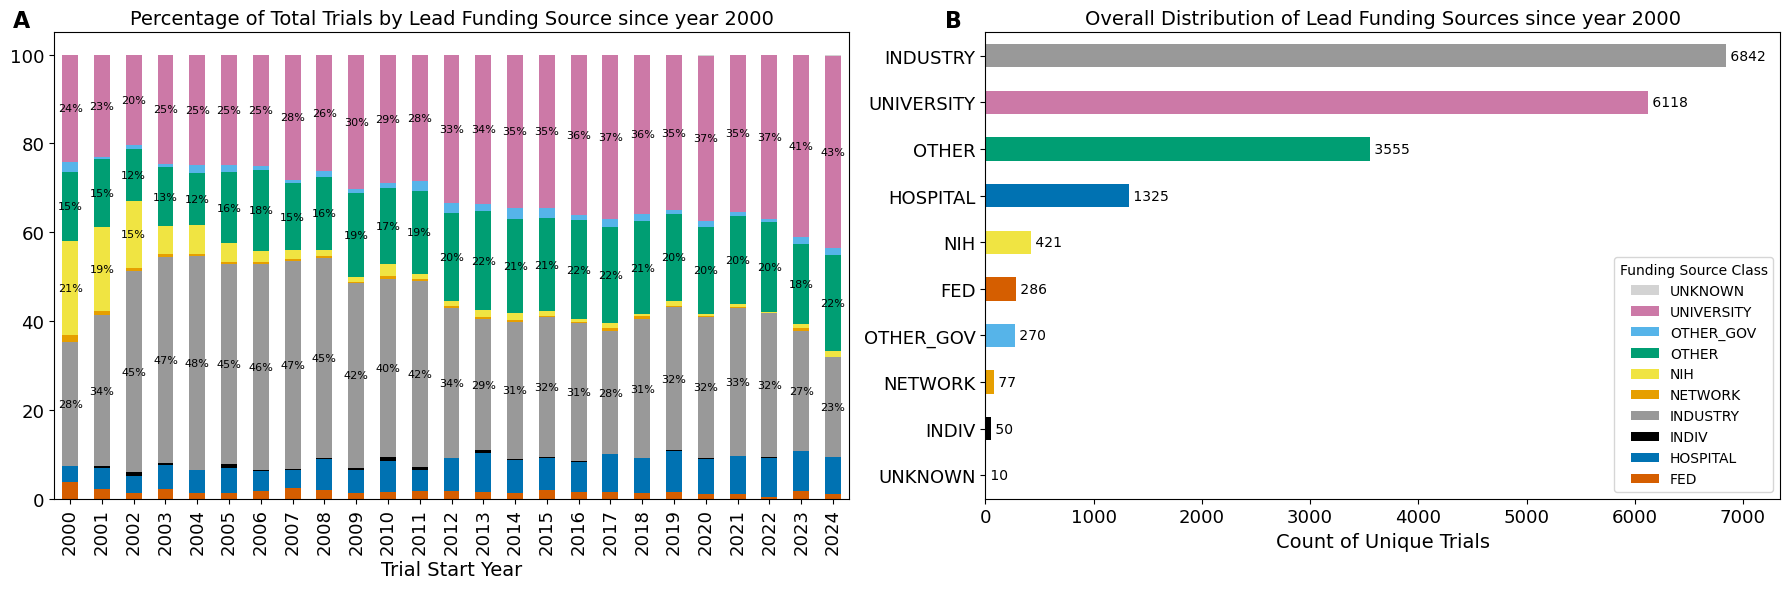

In [686]:
# Define color map
labels = ['UNKNOWN', 'INDIV', 'NETWORK', 'OTHER_GOV', 'FED', 'NIH', 'HOSPITAL', 'OTHER', 'UNIVERSITY', 'INDUSTRY']
colors = ['#d3d3d3', '#000000', '#E69F00', '#56B4E9', '#D55E00', '#F0E442', '#0072B2', '#009E73', '#CC79A7', '#999999']
color_map = dict(zip(labels, colors))

default_color = '#FFFFFF'  # White, change as needed

# Creating a pivot table with counts per agency_class and year
pivot_table_counts = df_filtered.pivot_table(index='start_year', columns='agency_class', values='nct_id', aggfunc='count', fill_value=0)
pivot_table_percentage = pivot_table_counts.divide(pivot_table_counts.sum(axis=1), axis=0) * 100
overall_distribution = pivot_table_counts.sum(axis=0).sort_values(ascending=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1 - Yearly Distribution
pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax1, color=[color_map.get(x, default_color) for x in pivot_table_counts.columns])
ax1.set_title('Percentage of Total Trials by Lead Funding Source since year 2000', fontsize=14)
ax1.set_xlabel('Trial Start Year', fontsize=14)
#ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.legend().set_visible(False)
ax1.tick_params(axis='both', labelsize=13)  # Increase tick label size

ax1.text(-0.03, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
# Adding text inside the bars
for bars_stack in ax1.containers:
    ax1.bar_label(bars_stack, labels=[f'{v:.0f}%' if v > 10 else '' for v in bars_stack.datavalues], label_type='center', fontsize=8)

# Plot 2 - Overall Distribution
overall_distribution.plot(kind='barh', ax=ax2, color=[color_map.get(x, default_color) for x in overall_distribution.index])
ax2.set_title('Overall Distribution of Lead Funding Sources since year 2000', fontsize=14)
ax2.set_xlabel('Count of Unique Trials', fontsize=14)
#ax2.set_ylabel('Agency Class', fontsize=12)
ax2.text(-0.03, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax2.set_ylabel('')

# Adding text labels to the bars
for index, value in enumerate(overall_distribution):
    ax2.text(value, index, f' {int(value)}', va='center', ha='left')
ax2.set_xlim(0, max(overall_distribution)+500)
ax2.tick_params(axis='both', labelsize=13)  # Increase tick label size

# Synchronize legend for both plots
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], title='Funding Source Class', loc='lower right')
#ax2.legend(loc='lower right')

plt.tight_layout()
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles[::-1], labels[::-1], title='Agency Class', loc='upper right', bbox_to_anchor=(1, 1))
plt.savefig(f'viz/trial_characteristics/general/lead_funding_agency_combined_{len(df_filtered)}.png')

plt.show()

In [236]:
# Function to concatenate columns into a comma-separated string after sorting them alphabetically
def combine_and_sort_columns(series):
    return ', '.join(sorted(series.unique()))

# Grouping by 'nct_id' and aggregating
grouped_df = df.groupby('nct_id').agg({
    'start_year': 'first',  # Assuming start year is the same for duplicated nct_id, just take the first
    'agency_class': combine_and_sort_columns,  # Sorted alphabetically
    'lead_or_collaborator': combine_and_sort_columns,
    'sponsor_name': combine_and_sort_columns
}).reset_index()

grouped_df


,nct_id,start_year,agency_class,lead_or_collaborator,sponsor_name
0,NCT00000117,1995.0,NIH,lead,National Eye Institute (NEI)
1,NCT00000146,1988.0,NIH,lead,National Eye Institute (NEI)
2,NCT00000147,1988.0,NIH,lead,National Eye Institute (NEI)
3,NCT00000151,1979.0,NIH,lead,National Eye Institute (NEI)
4,NCT00000170,1999.0,"NIH, OTHER","collaborator, lead","Jaeb Center for Health Research, National Eye ..."
...,...,...,...,...,...
19602,NCT06293911,2024.0,OTHER,lead,University of Pavia
19603,NCT06294236,2024.0,INDUSTRY,lead,Sana Biotechnology
19604,NCT06294821,2024.0,OTHER,lead,John Elfar
19605,NCT06296082,2024.0,OTHER,"collaborator, lead","Aragon Institute of Health Sciences, McGill Un..."


In [237]:
set(grouped_df['agency_class'])

{'AMBIG, INDUSTRY',
 'AMBIG, INDUSTRY, OTHER, UNKNOWN',
 'AMBIG, OTHER',
 'AMBIG, OTHER_GOV',
 'FED',
 'FED, INDIV',
 'FED, INDIV, OTHER',
 'FED, INDUSTRY',
 'FED, INDUSTRY, NETWORK',
 'FED, INDUSTRY, NETWORK, NIH, OTHER',
 'FED, INDUSTRY, NETWORK, OTHER',
 'FED, INDUSTRY, NIH',
 'FED, INDUSTRY, NIH, OTHER',
 'FED, INDUSTRY, NIH, OTHER, OTHER_GOV',
 'FED, INDUSTRY, OTHER',
 'FED, INDUSTRY, OTHER, UNKNOWN',
 'FED, INDUSTRY, UNKNOWN',
 'FED, NETWORK',
 'FED, NETWORK, OTHER',
 'FED, NIH',
 'FED, NIH, OTHER',
 'FED, NIH, OTHER, OTHER_GOV',
 'FED, OTHER',
 'FED, OTHER, OTHER_GOV',
 'FED, OTHER, OTHER_GOV, UNKNOWN',
 'FED, OTHER, UNKNOWN',
 'FED, OTHER_GOV',
 'FED, UNKNOWN',
 'INDIV',
 'INDIV, INDUSTRY',
 'INDIV, INDUSTRY, OTHER',
 'INDIV, NIH, OTHER, UNKNOWN',
 'INDIV, OTHER',
 'INDIV, OTHER, OTHER_GOV',
 'INDIV, OTHER, OTHER_GOV, UNKNOWN',
 'INDIV, UNKNOWN',
 'INDUSTRY',
 'INDUSTRY, NETWORK',
 'INDUSTRY, NETWORK, NIH',
 'INDUSTRY, NETWORK, NIH, OTHER',
 'INDUSTRY, NETWORK, OTHER',
 'INDUST